# Assignment 8 - Predicting the authors of the disputed federalist papers

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier


In [83]:
data = pd.read_csv('C:/Users/Dell/Downloads/Disputed_Essay_data.csv')
data.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [84]:
# Splitting the data

data_test = data[data['author']=='dispt']
data_tr = data[data['author']!='dispt']

In [85]:
data_test.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [86]:
data_tr.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [87]:
# Checking for missing values

data_tr.isna().sum()

author      0
filename    0
a           0
all         0
also        0
           ..
who         0
will        0
with        0
would       0
your        0
Length: 72, dtype: int64

In [88]:
data_tr['author'].value_counts()

Hamilton    51
Madison     15
Jay          5
HM           3
Name: author, dtype: int64

In [89]:
# Seperating the features and target

x = data_tr.drop(['author','filename'], axis = 1)
y = data_tr['author']

x.head()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [90]:
# Splitting the data for training and testing

x_tr, x_test, y_tr, y_test = train_test_split(x ,y, test_size = 0.2)

In [91]:
# Applying the decision tree

dtree = DecisionTreeClassifier(criterion = 'gini').fit(x_tr, y_tr)

In [92]:
pred_dtree = dtree.predict(x_test)

In [93]:
# Confusion matrix

cm = confusion_matrix(y_test, pred_dtree)
print(cm)

[[11  0  1]
 [ 0  1  1]
 [ 0  0  1]]


In [94]:
# Accuracy Score

accuracy_score(y_test, pred_dtree)

0.8666666666666667

In [95]:
# Classification Report

print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

    Hamilton       1.00      0.92      0.96        12
         Jay       1.00      0.50      0.67         2
     Madison       0.33      1.00      0.50         1

    accuracy                           0.87        15
   macro avg       0.78      0.81      0.71        15
weighted avg       0.96      0.87      0.89        15



In [96]:
# Printing the decision tree

tree.export_text(dtree)

'|--- feature_59 <= 0.02\n|   |--- feature_10 <= 0.03\n|   |   |--- feature_29 <= 0.14\n|   |   |   |--- class: HM\n|   |   |--- feature_29 >  0.14\n|   |   |   |--- class: Jay\n|   |--- feature_10 >  0.03\n|   |   |--- feature_11 <= 0.01\n|   |   |   |--- class: HM\n|   |   |--- feature_11 >  0.01\n|   |   |   |--- class: Madison\n|--- feature_59 >  0.02\n|   |--- class: Hamilton\n'

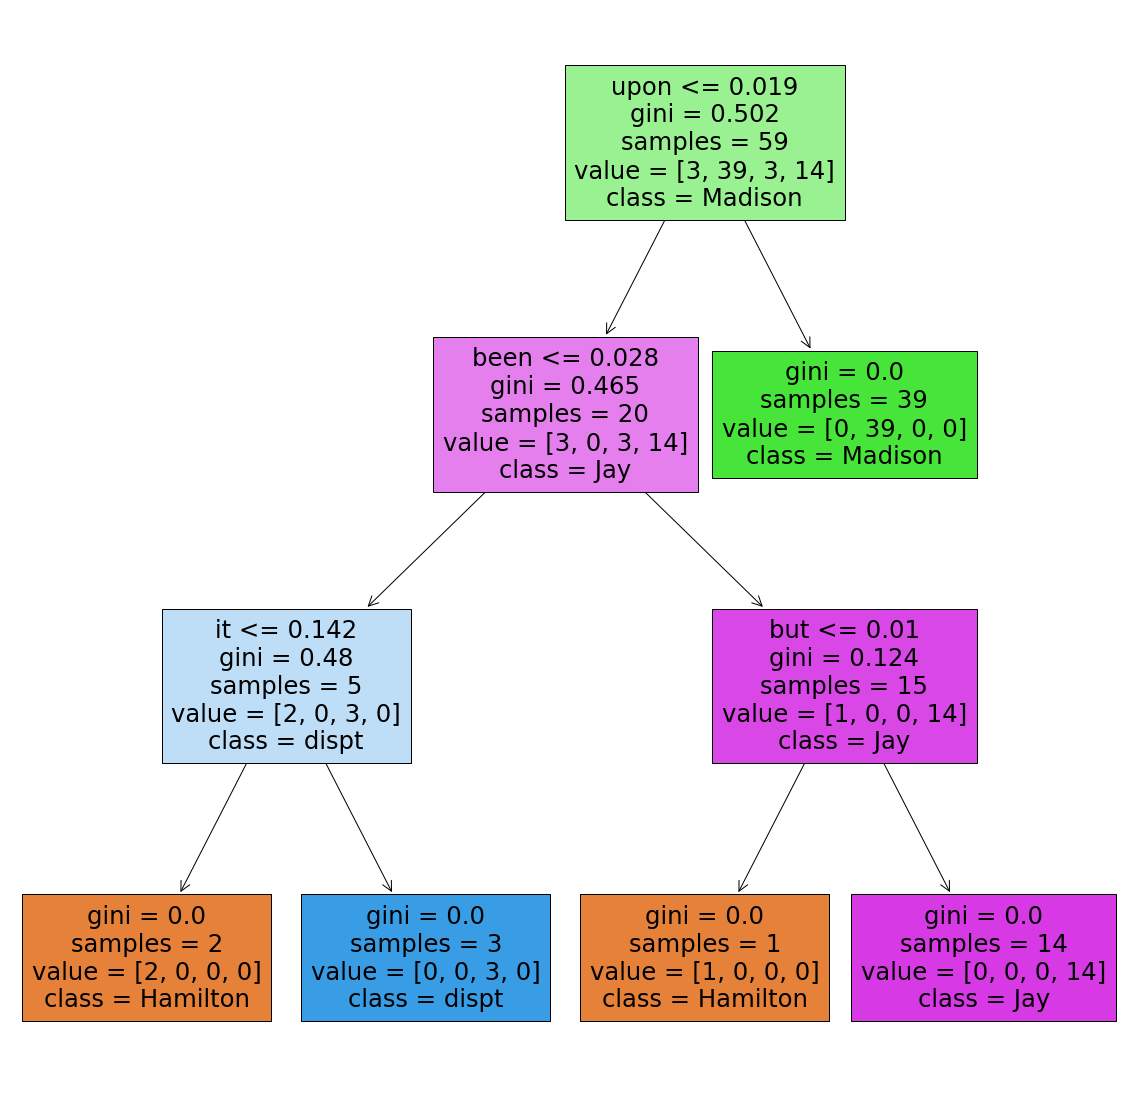

In [97]:
plt.figure(figsize = (20,20))
tree.plot_tree(dtree, feature_names = x.columns, class_names = data['author'].value_counts().index, filled = True)
plt.show()

In [98]:
# Predcition on test data

data_test = data_test.drop(['author', 'filename'], axis =1)

In [99]:
pred_test = dtree.predict(data_test)
pred_test

array(['Jay', 'HM', 'Jay', 'Madison', 'Madison', 'Madison', 'HM',
       'Madison', 'HM', 'HM', 'Madison'], dtype=object)

In [100]:
data_test['Predicted Author'] = pred_test
data_test.head()

,a,all,also,an,and,any,are,as,at,be,...,were,what,when,which,who,will,with,would,your,Predicted Author
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,Jay
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,HM
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,Jay
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,Madison
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,Madison


In [101]:
# Applying KNN Classification 

In [114]:
# Scaling the data
scaled_x_tr = StandardScaler().fit_transform(x)
scaled_x_test = StandardScaler().fit_transform(x_test)

In [115]:
# Splitting data into training and validation data

x_tr, x_test, yy_tr, yy_test = train_test_split(scaled_x_tr, y, test_size = 0.2)
x_tr.shape, x_test.shape, y_tr.shape, y_test.shape

((59, 70), (15, 70), (59,), (15,))

In [116]:
# Find the optimal number of k
params = {'n_neighbors':range(1,50)}

gscv_mod = GridSearchCV(KNeighborsClassifier(), params, cv = 10)

In [117]:
gscv_mod.fit(x_tr, y_tr)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [118]:
# Best k
gscv_mod.best_params_

{'n_neighbors': 7}

In [119]:
# Applying knn

knn_mod = KNeighborsClassifier(n_neighbors = 7).fit(x_tr, y_tr)

In [120]:
# Predicting 

pred_knn = knn_mod.predict(x_test)
pred_knn

array(['Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton'],
      dtype=object)

In [121]:
accuracy_score(y_test, pred_knn)

0.8

In [122]:
# Confusion matrix
print(confusion_matrix(y_test, pred_knn))

[[12  0  0]
 [ 2  0  0]
 [ 1  0  0]]


In [125]:
data_test2 = data_test.drop('Predicted Author', axis = 1)
data_test2

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0
5,0.245,0.059,0.007,0.067,0.282,0.052,0.111,0.252,0.015,0.297,...,0.007,0.030,0.015,0.037,0.186,0.045,0.111,0.089,0.037,0.0
6,0.349,0.036,0.007,0.029,0.335,0.058,0.087,0.073,0.116,0.378,...,0.015,0.029,0.015,0.007,0.211,0.022,0.145,0.073,0.073,0.0
7,0.414,0.083,0.009,0.018,0.478,0.046,0.110,0.074,0.037,0.331,...,0.018,0.009,0.009,0.000,0.175,0.018,0.267,0.129,0.037,0.0
8,0.248,0.040,0.007,0.040,0.356,0.034,0.154,0.161,0.047,0.289,...,0.027,0.007,0.020,0.020,0.201,0.040,0.154,0.027,0.040,0.0
9,0.442,0.062,0.006,0.075,0.423,0.037,0.093,0.100,0.031,0.379,...,0.000,0.000,0.025,0.012,0.199,0.031,0.106,0.081,0.031,0.0


In [126]:
# predicting using the test data
pred_test = knn_mod.predict(data_test2)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [127]:
data_test2['Pred_Author'] = pred_test
data_test2.head()

,a,all,also,an,and,any,are,as,at,be,...,were,what,when,which,who,will,with,would,your,Pred_Author
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,Hamilton
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,Hamilton
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,Hamilton
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,Hamilton
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,Hamilton


The model created using Decision Tree Classifier gives an accuracy score of 0.86 whereas the model created using K Neighbors gives an accuracy score of 0.8.

Therefore, from the accuracy we can see that the decision tree performs better in this case.